In [ ]:
# NAME: AJAYI MOJOLAOLUWA
# MATRIC NUMBER: 20CJ027415

# Supervised Machine Learning using Linear Regression
# This project explores how different employee characteristics affect monthly salary in Avetium payroll system 
# Avetium was where I carried out my 6-month Internship.
# I implemented gradient descent to train and evaluate a predictive model using simulated payroll data.    

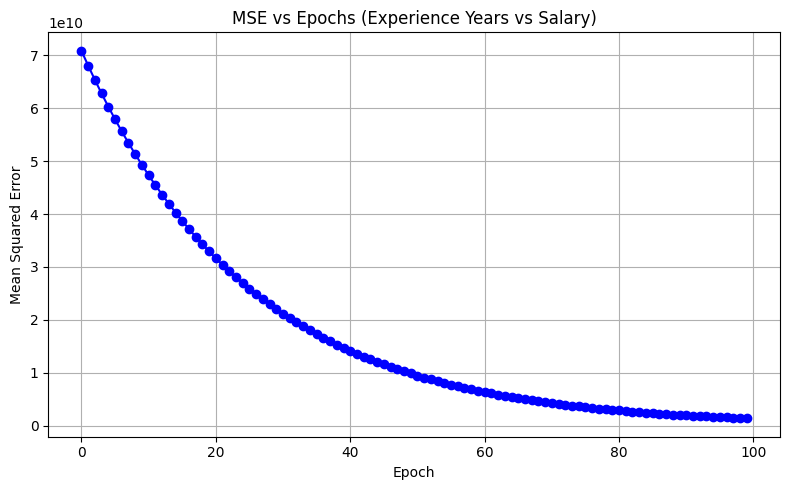

Final Weight: 52994.616
Final Bias: 224591.668
Final MSE: 1386456438.298


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Synthetic Data: Experience Years vs Salary ---
np.random.seed(42)
experience_years = np.random.randint(0, 21, 50).reshape(-1, 1)  # 0 to 20 years of experience
salary = 150000 + 10000 * experience_years + np.random.normal(0, 10000, (50, 1))  # with noise

# --- Design Matrix ---
X_synthetic = experience_years
y_synthetic = salary

# --- Preprocess (Normalization) ---
scaler = StandardScaler()
X_synthetic_normalized = scaler.fit_transform(X_synthetic)

# --- Define MSE and Gradient Descent ---
def mse(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def gradient_descent(X, y, w_init=0.0, b_init=0.0, lr=0.01, iterations=100):
    w, b = w_init, b_init
    m = len(y)
    mse_history = []
    for _ in range(iterations):
        y_pred = w * X + b
        error = y_pred - y
        dw = (2/m) * np.sum(error * X)
        db = (2/m) * np.sum(error)
        w -= lr * dw
        b -= lr * db
        mse_history.append(mse(y_pred, y))
    return w, b, mse_history

# --- Train Model ---
w, b, mse_hist = gradient_descent(X_synthetic_normalized, y_synthetic)

# --- Plot MSE History ---
plt.figure(figsize=(8, 5))
plt.plot(mse_hist, marker='o', color='blue')
plt.title("MSE vs Epochs (Experience Years vs Salary)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Output Final Results ---
print(f"Final Weight: {w:.3f}")
print(f"Final Bias: {b:.3f}")
print(f"Final MSE: {mse_hist[-1]:.3f}")


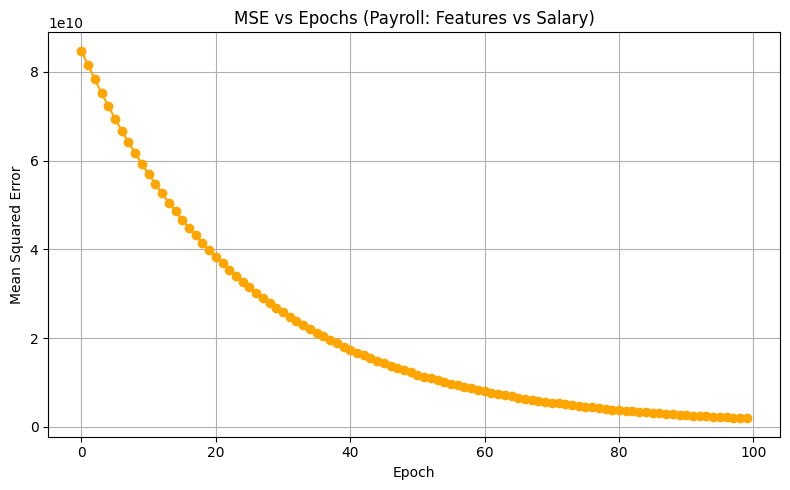

Final Weights: [47051.32294123 -2057.74476272  4324.44102088 -2051.496382  ]
Final Bias: 248145.525
Test MSE (Salary): 2176742742.45
Test MAE (Salary): 42456.77


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Step 1: Simulate Payroll Dataset ---
np.random.seed(42)
experience = np.random.randint(0, 21, 100).reshape(-1, 1)
age = np.random.randint(22, 60, 100).reshape(-1, 1)
education_code = np.random.choice([1, 2, 3, 4], 100).reshape(-1, 1)  # HND=1, BSc=2, MSc=3, PhD=4
gender_code = np.random.choice([0, 1], 100).reshape(-1, 1)  # Male=0, Female=1

# Combine features: shape (100, 4)
X_payroll = np.hstack((experience, age, education_code, gender_code))

# Salary calculation: base + experience + age + education bonus + random noise
y_payroll = 180000 + (10000 * experience) + (2000 * education_code) + np.random.normal(0, 15000, (100, 1))

# --- Step 2: Normalize Features ---
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_payroll)

# --- Step 3: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_payroll.ravel(), test_size=0.2, random_state=42)

# --- Step 4: Define Gradient Descent ---
def predict_multi(X, w, b):
    return np.dot(X, w) + b

def mse(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def gradient_descent_multi(X, y, w_init, b_init=0.0, lr=0.01, iterations=100):
    w = w_init
    b = b_init
    m = len(y)
    mse_history = []

    for _ in range(iterations):
        y_pred = predict_multi(X, w, b)
        error = y_pred - y
        dw = (2/m) * np.dot(X.T, error)
        db = (2/m) * np.sum(error)
        w -= lr * dw
        b -= lr * db
        mse_history.append(mse(y_pred, y))

    return w, b, mse_history

# --- Step 5: Train Model ---
w_init = np.zeros(X_train.shape[1])
w, b, mse_hist = gradient_descent_multi(X_train, y_train, w_init)

# --- Step 6: Evaluate on Test Set ---
y_test_pred = predict_multi(X_test, w, b)
final_mse = mse(y_test_pred, y_test)
final_mae = np.mean(np.abs(y_test_pred - y_test))

# --- Step 7: Plot MSE History ---
plt.figure(figsize=(8, 5))
plt.plot(mse_hist, marker='o', color='orange')
plt.title("MSE vs Epochs (Payroll: Features vs Salary)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 8: Print Results ---
print(f"Final Weights: {w}")
print(f"Final Bias: {b:.3f}")
print(f"Test MSE (Salary): {final_mse:.2f}")
print(f"Test MAE (Salary): {final_mae:.2f}")
